# 人工智能范式（AI Paradigm）

### 目录
1. [Rule Based](#Rule-Based)
   1. [基于语法规则](#基于语法规则)         
   2. [基于模式或模板](#基于模式或模板)
2. [Probability Based](#Probability-Based)   

### [Rule Based](#目录)
- 基于预先定义的规则或模式，如对话生成中，根据预先定义好的语法来生成合理的语句
- 当规则(语法)发生了改变，整个系统可能需要重写

In [30]:
import random

In [31]:
# 简单的语法规则

simple_grammar = """
sentence => noun_phrase verb_phrase
noun_phrase => Article Adj* noun
Adj* => null | Adj Adj*
verb_phrase => verb noun_phrase
Article =>  一个 | 这个
noun =>   女人 |  篮球 | 桌子 | 小猫
verb => 看着   |  坐在 |  听着 | 看见
Adj =>  蓝色的 | 好看的 | 小小的
"""

In [32]:
# 生成单个形容词


def adj():
    return random.choice("蓝色的 | 好看的 | 小小的".split("|")).split()[0]


adj(), adj()

('蓝色的', '蓝色的')

In [33]:
# 生成零个或多个形容词


def adj_star():
    return random.choice([None, adj() + adj_star()])


adj_star()

# choice 需要先执行完被选择列表中的内容再选择，所以出现无限递归的问题

RecursionError: maximum recursion depth exceeded while calling a Python object

In [34]:
# 生成零个或多个形容词


def adj_star():
    return random.choice([lambda: '', lambda: adj() + adj_star()])()


adj_star(), adj_star()
# 被选择的列表为匿名函数，不会立即执行

('', '小小的')

### [基于语法规则](#目录)

In [35]:
# 将预定义语法字符串转化成 python 格式


def create_grammar(grammar_str, split='=>', line_split='\n'):
    grammar = {}
    for line in grammar_str.split(line_split):
        if not line.strip():
            continue
        exp, stmt = line.split(split)
        grammar[exp.strip()] = [s.split() for s in stmt.split('|')]
    return grammar

In [36]:
# 生成语法

adj_grammar = """
Adj* => null | Adj Adj*
Adj =>  蓝色的 | 好看的 | 小小的
"""

grammar = create_grammar(adj_grammar)
grammar

{'Adj*': [['null'], ['Adj', 'Adj*']], 'Adj': [['蓝色的'], ['好看的'], ['小小的']]}

In [37]:
# 根据语法生成语句

from random import choice


def generate(gram, target):
    if target not in gram:
        return target
    expanded = [generate(gram, t) for t in choice(gram[target])]
    return ''.join(e for e in expanded if e != 'null')

In [38]:
example_grammar = create_grammar(simple_grammar)
example_grammar

{'sentence': [['noun_phrase', 'verb_phrase']],
 'noun_phrase': [['Article', 'Adj*', 'noun']],
 'Adj*': [['null'], ['Adj', 'Adj*']],
 'verb_phrase': [['verb', 'noun_phrase']],
 'Article': [['一个'], ['这个']],
 'noun': [['女人'], ['篮球'], ['桌子'], ['小猫']],
 'verb': [['看着'], ['坐在'], ['听着'], ['看见']],
 'Adj': [['蓝色的'], ['好看的'], ['小小的']]}

In [39]:
generate(gram=example_grammar, target='sentence')

'这个小小的女人看见一个好看的小猫'

#### 1. 模拟人类和机器人对话：

In [40]:
# 在西部世界里，一个”人类“的语言可以定义为：
human = """
human = 自己 寻找 活动
自己 = 我 | 俺 | 我们 
寻找 = 找找 | 想找点 
活动 = 乐子 | 玩的
"""

# 一个“接待员”的语言可以定义为
host = """
host = 寒暄 报数 询问 业务相关 结尾 
报数 = 我是 数字 号 ,
数字 = 单个数字 | 数字 单个数字 
单个数字 = 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 
寒暄 = 称谓 打招呼 | 打招呼
称谓 = 人称 ,
人称 = 先生 | 女士 | 小朋友
打招呼 = 你好, | 您好,
询问 = 请问你要 | 您需要
业务相关 = 玩玩 具体业务
玩玩 = null
具体业务 = 喝酒 | 打牌 | 打猎 | 赌博
结尾 = 吗？
"""

In [41]:
for i in range(5):
    print(generate(gram=create_grammar(host, split='='), target='host'))
    print(generate(gram=create_grammar(human, split='='), target='human'))

先生,您好,我是652号,请问你要打猎吗？
我们找找乐子
女士,你好,我是9号,您需要打牌吗？
我找找玩的
你好,我是36号,请问你要喝酒吗？
我想找点乐子
你好,我是77号,请问你要打牌吗？
俺找找玩的
女士,您好,我是31号,请问你要赌博吗？
我们想找点乐子


#### 2. 客服机器

In [42]:
service_robot = """
ask = 打招呼 , 自我介绍 , 询问 

打招呼 = 称谓 , 招呼 
称谓 = 亲 | 先生 | 女士 | 小朋友 | 美女| 帅哥
人称 = 你 | 您 
招呼 = 人称 好

自我介绍 = 我是 数字 号客服|我是客服 名称
数字 = 单个数字 | 数字 单个数字 
单个数字 = 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9
名称 = 小芳 | 小静 | 张三 | 王五

询问 = 人称 动作 结尾
动作 = 想知道 业务+ | 想了解 业务+ |想咨询 业务+ | 对 业务+ 感兴趣
业务+ = 业务 | 业务 和 业务+ 
业务 = 产品详情 | 购买须知 | 优惠券 | 使用方法 | 订单查询 | 产品维修 | 退货流程 | 退款详情 | 人工客服 
结尾 = 吗？ 
"""

In [43]:
def create_grammar(grammar_str, split='=', line_split='\n'):
    grammar = {}
    for line in grammar_str.split(line_split):
        if not line.strip():
            continue
        exp, stmt = line.split(split)
        grammar[exp.strip()] = [s.split() for s in stmt.split('|')]
    return grammar

In [44]:
example_gram = create_grammar(service_robot)
example_gram

{'ask': [['打招呼', ',', '自我介绍', ',', '询问']],
 '打招呼': [['称谓', ',', '招呼']],
 '称谓': [['亲'], ['先生'], ['女士'], ['小朋友'], ['美女'], ['帅哥']],
 '人称': [['你'], ['您']],
 '招呼': [['人称', '好']],
 '自我介绍': [['我是', '数字', '号客服'], ['我是客服', '名称']],
 '数字': [['单个数字'], ['数字', '单个数字']],
 '单个数字': [['1'], ['2'], ['3'], ['4'], ['5'], ['6'], ['7'], ['8'], ['9']],
 '名称': [['小芳'], ['小静'], ['张三'], ['王五']],
 '询问': [['人称', '动作', '结尾']],
 '动作': [['想知道', '业务+'], ['想了解', '业务+'], ['想咨询', '业务+'], ['对', '业务+', '感兴趣']],
 '业务+': [['业务'], ['业务', '和', '业务+']],
 '业务': [['产品详情'],
  ['购买须知'],
  ['优惠券'],
  ['使用方法'],
  ['订单查询'],
  ['产品维修'],
  ['退货流程'],
  ['退款详情'],
  ['人工客服']],
 '结尾': [['吗？']]}

In [45]:
import random
choice = random.choice


def generate(gram, target):
    if target not in gram: return target
    expaned = [generate(gram, t) for t in choice(gram[target])]
    return "".join([e if e != '/n' else '\n' for e in expaned if e != 'null'])

In [46]:
generate(gram=example_gram, target='ask')

'帅哥,您好,我是9155号客服,你想咨询优惠券和产品维修吗？'

In [47]:
# 生成多个句子


def generate_n(n, gram, target):
    return [generate(gram, target) for _ in range(n)]


generate_n(3, gram=example_gram, target='ask')

['小朋友,您好,我是客服小芳,您想知道退货流程和退货流程和产品维修和使用方法和产品详情吗？',
 '帅哥,你好,我是客服张三,您想咨询优惠券吗？',
 '小朋友,您好,我是4号客服,你想知道使用方法和订单查询和人工客服吗？']

### [基于模式或模板](#目录)
> Pattern: (我想要A)     
Response: (如果你有 A，对你意味着什么呢？)  

>Input: (我想要度假)    
Response: (如果你有度假，对你意味着什么呢？)

为了实现模板的判断和定义，定义特殊的符号，来表示是一个占位符。例如， "I want ?X", 意思就是 ?X 是一个用来占位的符号
如果输入了"I want holiday"， 在这里 'holiday' 就是 '?X'


In [48]:
# 判断是否为变量：变量定义为以 ？开头 的单词

def is_variable(pat):
    return pat.startswith('?') and all(s.isalpha() for s in pat[1:])

is_variable('?hello'), is_variable('?hello world')

(True, False)

In [49]:
# 判断句子与模板是否匹配，模板中包含上述的变量


def pat_match_1(pattern, sent):
    if is_variable(pattern[0]):
        return True
    else:
        if pattern[0] != sent[0]:
            return False
        else:
            return pat_match_1(pattern[1:], sent[1:])
        
        
pat_match_1("I want ?x", "I want holiday")        

True

In [50]:
pat_match_1("I have dreamed a ?x", "I dreamed about dog")

False

In [51]:
# 判断句子与模板是否匹配，获得匹配的变量


def pat_match_2(pattern, sent):
    if is_variable(pattern[0]):
        return pattern[0], sent[0]
    else:
        if pattern[0] != sent[0]: return False
        else:
            return pat_match_2(pattern[1:], sent[1:])

pattern = 'I want ?X'.split()
sent = "I want holiday".split()
pat_match_2(pattern, sent)

('?X', 'holiday')

In [52]:
# "I need iPhone" 和 "I need ?X" 可以匹配，
# 但是"I need an iPhone" 和 "I need ?X" 就不匹配
# 新建一个变量类型 "?*X", 多了一个星号(*),表示匹配多个
# 多个部分匹配


def pat_match(pattern, saying):
    if not pattern or not saying:
        return []
    if is_variable(pattern[0]):
        return [(pattern[0], saying[0])] + pat_match(pattern[1:], saying[1:])
    else:
        if pattern[0] != saying[0]:
            return []
        else:
            return pat_match(pattern[1:], saying[1:])


pat_match("?X greater than ?Y".split(), "3 greater than 2".split())

[('?X', '3'), ('?Y', '2')]

In [53]:
# 将模板中的变量替换成单词，生成句子


def pat_to_dict(patterns):
    return {k: v for k, v in patterns}


def subsitite(rule, parsed_rules):
    if not rule:
        return []
    return [parsed_rules.get(rule[0], rule[0])] + subsitite(
        rule[1:], parsed_rules)

In [54]:
got_patterns = pat_match("I want ?X".split(), "I want iPhone".split())
got_patterns

[('?X', 'iPhone')]

In [55]:
' '.join(
    subsitite("What if you mean if you got a ?X".split(),
              pat_to_dict(got_patterns)))

'What if you mean if you got a iPhone'

In [56]:
john_pat = pat_match('?P needs ?X'.split(), "John needs vacation".split())
john_pat

[('?P', 'John'), ('?X', 'vacation')]

In [57]:
' '.join(subsitite("Why does ?P need ?X ?".split(), pat_to_dict(john_pat)))

'Why does John need vacation ?'

#### 基于模板生成对话

In [58]:
defined_patterns = {
    "I need ?X": ["Image you will get ?X soon", "Why do you need ?X ?"],
    "My ?X told me something":
    ["Talk about more about your ?X", "How do you think about your ?X ?"]
}

In [59]:
import random


def get_response(saying, rules=defined_patterns):
    """" 
    >>> get_response('I need iPhone') 
    >>> Image you will get iPhone soon
    >>> get_response("My mother told me something")
    >>> Talk about more about your monther.
    """
    for pat, response_pats in rules.items():
        match = pat_match(pat.split(), saying.split())
        if match:
            match_dic = pat_to_dict(match)
            response_pat = random.choice(response_pats)
            return ' '.join(subsitite(response_pat.split(), match_dic))


get_response('I need iPhone'), get_response("My mother told me something")

('Image you will get iPhone soon', 'Talk about more about your mother')

In [60]:
# 上述匹配规则太死板，必须逐字逐句匹配，实现更宽泛的匹配


def is_pattern_segment(pattern):
    return pattern.startswith('?*') and all(a.isalpha() for a in pattern[2:])


is_pattern_segment('?*Pos')

True

In [61]:
# 判断是否匹配，并获取匹配的单词
from collections import defaultdict


def segment_match(pattern, saying):
    """
    pattern: pattern[0] 必须以 '?*' 开始, eg:'?*P'
    """
    seg_pat, rest = pattern[0], pattern[1:]
    seg_pat = seg_pat.replace('?*', '?')
    if not rest:
        return (seg_pat, saying), len(saying)
    for i, token in enumerate(saying):
        if rest[0] == token and is_match(rest[1:], saying[(i + 1):]):
            return (seg_pat, saying[:i]), i
    return (seg_pat, saying), len(saying)


def is_match(rest, saying):
    if not rest and not saying:
        return True
    if not all(a.isalpha() for a in rest[0]):
        return True
    if rest[0] != saying[0]:
        return False
    return is_match(rest[1:], saying[1:])


segment_match(['?*P', 'hello', 'world'], ['mike', 'jack', 'hello', 'world'])

(('?P', ['mike', 'jack']), 2)

In [62]:
# 多位匹配，获取所有匹配的单词

fail = [True, None]


def pat_match_with_seg(pattern, saying):
    if not pattern or not saying:
        return []
    pat = pattern[0]
    if is_variable(pat):
        return [(pat, saying[0])] + pat_match_with_seg[pattern[1:], saying[1:]]
    elif is_pattern_segment(pat):
        match, index = segment_match(pattern, saying)
        return [match] + pat_match_with_seg(pattern[1:], saying[index:])
    elif pat == saying[0]:
        return pat_match_with_seg(pattern[1:], saying[1:])
    else:
        return fail

In [63]:
pat_match_with_seg('My ?*PL are very good ?*L'.split(),
                   "My dog and my cat are very good and very friendly".split())

[('?PL', ['dog', 'and', 'my', 'cat']), ('?L', ['and', 'very', 'friendly'])]

In [64]:
response_pair = {
    'I need ?X': ["Why do you neeed ?X"],
    "I dont like my ?X": ["What bad things did ?X do for you?"]
}

In [65]:
pat_match_with_seg('?*X hello ?*Y'.split(), "I am mike, hello ".split())

[('?X', ['I', 'am', 'mike,'])]

In [66]:
pat_match_with_seg('?*X need ?*P too'.split(), "I need an iPhone".split())

[('?X', ['I']), ('?P', ['an', 'iPhone'])]

In [67]:
# 生成句子
subsitite(
    "Why do you neeed ?X".split(),
    pat_to_dict(
        pat_match_with_seg('I need ?*X'.split(), "I need an iPhone".split())))

['Why', 'do', 'you', 'neeed', ['an', 'iPhone']]

In [68]:
def pat_to_dict(patterns):
    return {k: ' '.join(v) if isinstance(v, list) else v for k, v in patterns}

In [69]:
subsitite(
    "Why do you neeed ?X".split(),
    pat_to_dict(
        pat_match_with_seg('I need ?*X'.split(), "I need an iPhone".split())))

['Why', 'do', 'you', 'neeed', 'an iPhone']

In [70]:
# 生成对话

import random


def get_response(saying, response_rules):
    responses = []
    for pat, response_pats in response_rules.items():
        match = pat_match_with_seg(pat.split(), saying.split())
        if match:
            match_dic = pat_to_dict(match)
            response_pat = random.choice(response_pats)
            responses.append(' '.join(
                subsitite(response_pat.split(), match_dic)))
    return responses


rule_responses = {
    '?*x hello ?*y': ['How do you do', 'Please state your problem'],
    '?*x I want ?*y': [
        'what would it mean if you got ?y', 'Why do you want ?y',
        'Suppose you got ?y soon'
    ],
    '?*x if ?*y': [
        'Do you really think its likely that ?y', 'Do you wish that ?y',
        'What do you think about ?y', 'Really-- if ?y'
    ],
    '?*x no ?*y': [
        'why not?', 'You are being a negative',
        'Are you saying \'No\' just to be negative?'
    ],
    '?*x I was ?*y': [
        'Were you really', 'Perhaps I already knew you were ?y',
        'Why do you tell me you were ?y now?'
    ],
    '?*x I feel ?*y':
    ['Do you often feel ?y ?', 'What other feelings do you have?']
}

sayings = """
hello hello world!
Now I want to fly.
I always konw what I want to do.
After the accident I was  so depressed.
After the vacation I feel  so good.
"""

for saying in sayings.strip().split('\n'):
    print('>>> ' + saying)
    print(get_response(saying, response_rules=rule_responses))
    print()

>>> hello hello world!
['How do you do', 'Why do you want ?y', 'What do you think about ?y', 'You are being a negative', 'Why do you tell me you were ?y now?', 'What other feelings do you have?']

>>> Now I want to fly.
['Please state your problem', 'Suppose you got to fly. soon', 'Do you really think its likely that ?y', 'why not?', 'Why do you tell me you were ?y now?', 'What other feelings do you have?']

>>> I always konw what I want to do.
['How do you do', 'Suppose you got to do. soon', 'Really-- if ?y', "Are you saying 'No' just to be negative?", 'Why do you tell me you were ?y now?', 'Do you often feel ?y ?']

>>> After the accident I was  so depressed.
['How do you do', 'Suppose you got ?y soon', 'Do you really think its likely that ?y', "Are you saying 'No' just to be negative?", 'Perhaps I already knew you were so depressed.', 'Do you often feel ?y ?']

>>> After the vacation I feel  so good.
['How do you do', 'Why do you want ?y', 'Do you really think its likely that ?y', '

### [Probability Based](#目录)
- 基于规则的模型，太复杂，性能较差
- 基于概率的语言模型：
>两句话：今天早上吃晚饭的时候；今天早上吃早饭的时候，前者在真实语境中出现的**概率**更高
- $sent=w_1 w_2 w_3 w_4$，将句子拆解成单词，句子出现的概率可以转换成单词出现的概率：
>$ P(w_1 w_2 w_3 w_4) = P(w_1 | w_2 w_3 w_ 4)*P(w2 | w_3 w_4)*P(w_3 | w_4)* P(w_4)$
$ P(w_1 w_2 w_3 w_4) \sim Pr(w_1 | w_2 )*P(w2 | w_3 )*P(w_3 | w_4)*P(w_4)$

### 训练语言模型

In [1]:
import re
import random
from collections import Counter
from functools import reduce
import operator
import pandas as pd
import jieba

In [4]:
# 原始语料：新闻数据

file_path = 'datasets/sqlResult_1558435.csv'
content = pd.read_csv(file_path, encoding='utf-8')
content.head()

,id,author,source,content,feature,title,url
0,89617,NaN,快科技@http://www.kkj.cn/,此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""37""...",小米MIUI 9首批机型曝光：共计15款,http://www.cnbeta.com/articles/tech/623597.htm
1,89616,NaN,快科技@http://www.kkj.cn/,骁龙835作为唯一通过Windows 10桌面平台认证的ARM处理器，高通强调，不会因为只考...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""15""...",骁龙835在Windows 10上的性能表现有望改善,http://www.cnbeta.com/articles/tech/623599.htm
2,89615,NaN,快科技@http://www.kkj.cn/,此前的一加3T搭载的是3400mAh电池，DashCharge快充规格为5V/4A。\r\n...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""18""...",一加手机5细节曝光：3300mAh、充半小时用1天,http://www.cnbeta.com/articles/tech/623601.htm
3,89614,NaN,新华社,这是6月18日在葡萄牙中部大佩德罗冈地区拍摄的被森林大火烧毁的汽车。新华社记者张立云摄\r\n,"{""type"":""国际新闻"",""site"":""环球"",""commentNum"":""0"",""j...",葡森林火灾造成至少62人死亡 政府宣布进入紧急状态（组图）,http://world.huanqiu.com/hot/2017-06/10866126....
4,89613,胡淑丽_MN7479,深圳大件事,（原标题：44岁女子跑深圳约会网友被拒，暴雨中裸身奔走……）\r\n@深圳交警微博称：昨日清...,"{""type"":""新闻"",""site"":""网易热门"",""commentNum"":""978"",...",44岁女子约网友被拒暴雨中裸奔 交警为其披衣相随,http://news.163.com/17/0618/00/CN617P3Q0001875...


In [5]:
# 文本处理，删除非文字

articles = content['content'].tolist()


def token(string):
    return re.findall('\w+', string)

In [10]:
example = articles[110]
token(example)

['在外国名著',
 '麦田里的守望者',
 '中',
 '作者想要守护麦田里如自己内心一般纯真的孩子们',
 '而驻村干部们',
 '也在这个炎热的夏天里撸袖子上阵',
 '真正做起了村民们的',
 '麦田守望者',
 '三夏时节不等人',
 '你看到了吗',
 '不停翻涌起伏',
 '仿若铺陈至天边的金黄麦浪中',
 '那若隐若现的人影',
 '是自治区新闻出版广电局驻和田市肖尔巴格乡合尼村工作队的队员与工作队组织的青年志愿者',
 '在这个炎热的夏季',
 '他们深入田间地头',
 '帮助村民们收割小麦',
 '扛起收麦机',
 '麦田中的每个人都显得兴致勃勃',
 '一天下来就近22亩小麦收割完毕',
 '志愿者麦麦提亚森擦去满脸的汗水',
 '高兴地告诉驻村队员',
 '我们青年志愿者应该多做贡献',
 '为村里的脱贫致富出把力',
 '工作队带着我们为村里的老人服务',
 '看到那些像我爷爷奶奶一样的老人赞许感谢的目光',
 '我体会到了帮助他人的快乐',
 '自治区新闻出版广电局驻村工作队孙敏',
 '艾力依布拉音',
 '麦收时节',
 '我们在一起',
 '6月中旬的和田墨玉',
 '麦田金黄',
 '静待收割',
 '6月14日',
 '15日两天',
 '自治区高级人民法院驻和田地区墨玉县吐外特乡罕勒克艾日克村工作队与48名村民志愿者一道',
 '帮助村里29户有需要的村民进行小麦收割工作',
 '田间地头',
 '罕勒克艾日克村志愿队的红旗迎风飘扬',
 '格外醒目',
 '10余台割麦机一起轰鸣',
 '男人们在用机器收割小麦的同时',
 '几名妇女也加入到志愿队',
 '构成了一道美丽的麦收风景',
 '休息空闲',
 '工作队员和村民们坐在树荫下',
 '田埂上',
 '互相问好',
 '聊天',
 '语言交流有困难',
 '就用手势',
 '动作比划着聊天',
 '有趣地交流方式不时引来阵阵欢笑',
 '大家在一同享受丰收和喜悦',
 '也一同增进着彼此的情感和友谊',
 '自治区高级人民法院驻村工作队周春梅',
 '艾地艾木',
 '阿不拉',
 '细看稻菽千重浪',
 '6月15日',
 '自治区煤田灭火工程局的干部职工们再一次跋涉1000多公里来到了叶城县萨依巴格乡阿亚格欧尔达贝格村',
 '见到了自己的亲戚',
 '现场处处都

In [11]:
cleaned_articles = [''.join(token(str(a)))for a in articles]
len(cleaned_articles)

89611

In [14]:
# 分词生成标记
tokens = []
for article in cleaned_articles:
    tokens += list(jieba.cut(article))

Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
Loading model cost 0.432 seconds.
Prefix dict has been built successfully.


In [15]:
# 统计词频
words_count = Counter(tokens)
words_count.most_common(10)

[('的', 703716),
 ('n', 382020),
 ('在', 263597),
 ('月', 189330),
 ('日', 166300),
 ('新华社', 142462),
 ('和', 134061),
 ('年', 123106),
 ('了', 121938),
 ('是', 100909)]

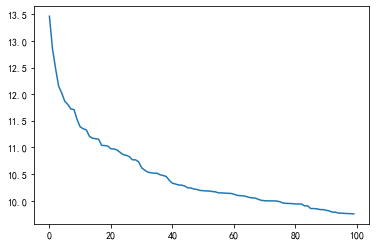

In [18]:
# log 词频
import matplotlib.pyplot as plt
import numpy as np

frequiences = [f for w, f in words_count.most_common(100)]
x = [i for i in range(100)]
plt.plot(x, np.log(frequiences));

In [19]:
# 计算频率
def prob_1(word):
    return words_count[word] / len(tokens)


prob_1("我们")

0.0011399627455473877

In [20]:
# 生成 2-gram 单词组合
tokens_2_gram = [''.join(tokens[i:i + 2]) for i in range(len(tokens[:-2]))]
tokens_2_gram[:10]

['此外自', '自本周', '本周6', '6月', '月12', '12日起', '日起除', '除小米', '小米手机', '手机6']

In [21]:
words_count_2 = Counter(tokens_2_gram)
words_count_2.most_common(10)

[('n新华社', 74664),
 ('2017年', 61480),
 ('外代二线', 61301),
 ('日n', 52293),
 ('新华社照片', 50401),
 ('5月', 37977),
 ('4月', 34571),
 ('新华社记者', 30864),
 ('２０', 27166),
 ('日在', 27154)]

In [23]:
# 2-gram 出现的概率

def prob_2(word1, word2):
    if word1 + word2 in words_count_2:
        return words_count_2[word1 + word2] / len(tokens_2_gram)
    else:
        return 1 / len(tokens_2_gram)


prob_2("在", "吃饭"), prob_2("在", "吃水")

(2.852474416014339e-07, 5.704948832028678e-08)

In [28]:
# 计算句子出现的概率


def get_probablity(sentence):
    words = list(jieba.cut(sentence))

    sentence_pro = 1

    for i, word in enumerate(words[:-1]):
        next_ = words[i + 1]

        probability = prob_2(word, next_)

        sentence_pro *= probability

    return sentence_pro


get_probablity('小明在喝水'), get_probablity('小明在飞翔')

(1.3018576470426152e-14, 3.254644117606538e-15)

In [71]:
# 结合规则生成的句子，获得句子的概率
for sen in [
        generate(gram=example_grammar, target='sentence') for i in range(5)
]:
    print('sentence: {} with Prb: {}'.format(sen, get_probablity(sen)))

sentence: 这个篮球看着这个小猫 with Prb: 1.2711249998725007e-28
sentence: 一个好看的篮球看见一个篮球 with Prb: 3.0448757946331477e-40
sentence: 一个蓝色的小小的篮球坐在这个小小的女人 with Prb: 5.049246141565204e-56
sentence: 这个小猫看着一个好看的蓝色的小猫 with Prb: 6.980077866099737e-52
sentence: 一个小猫听着一个女人 with Prb: 3.6162430351070537e-32


In [72]:
# 粗略评估模型性能

need_compared = [
    "今天晚上请你吃大餐，我们一起吃日料 明天晚上请你吃大餐，我们一起吃苹果", "真事一只好看的小猫 真是一只好看的小猫",
    "今晚我去吃火锅 今晚火锅去吃我", "洋葱奶昔来一杯 养乐多绿来一杯"
]

for s in need_compared:
    s1, s2 = s.split()
    p1, p2 = get_probablity(s1), get_probablity(s2)

    better = s1 if p1 > p2 else s2

    print('{} is more possible'.format(better))
    print('-' * 4 + ' {} with probility {}'.format(s1, p1))
    print('-' * 4 + ' {} with probility {}'.format(s2, p2))

今天晚上请你吃大餐，我们一起吃日料 is more possible
---- 今天晚上请你吃大餐，我们一起吃日料 with probility 1.9877960696419972e-66
---- 明天晚上请你吃大餐，我们一起吃苹果 with probility 1.5902368557135977e-66
真是一只好看的小猫 is more possible
---- 真事一只好看的小猫 with probility 4.6410899733664495e-34
---- 真是一只好看的小猫 with probility 8.135199999184005e-27
今晚我去吃火锅 is more possible
---- 今晚我去吃火锅 with probility 3.4535695372779675e-20
---- 今晚火锅去吃我 with probility 5.508208332780837e-28
养乐多绿来一杯 is more possible
---- 洋葱奶昔来一杯 with probility 1.8567578157408427e-22
---- 养乐多绿来一杯 with probility 3.254644117606538e-15


In [73]:
# 豆瓣影评，重新训练语言模型
content = pd.read_csv('datasets/movie_comments.csv', encoding='utf-8-sig')
content.head()

/home/yangbin7/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (0,4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,link,name,comment,star
0,1,https://movie.douban.com/subject/26363254/,战狼2,吴京意淫到了脑残的地步，看了恶心想吐,1
1,2,https://movie.douban.com/subject/26363254/,战狼2,首映礼看的。太恐怖了这个电影，不讲道理的，完全就是吴京在实现他这个小粉红的英雄梦。各种装备轮...,2
2,3,https://movie.douban.com/subject/26363254/,战狼2,吴京的炒作水平不输冯小刚，但小刚至少不会用主旋律来炒作…吴京让人看了不舒服，为了主旋律而主旋...,2
3,4,https://movie.douban.com/subject/26363254/,战狼2,凭良心说，好看到不像《战狼1》的续集，完虐《湄公河行动》。,4
4,5,https://movie.douban.com/subject/26363254/,战狼2,中二得很,1


In [74]:
comments = content['comment'].tolist()
len(comments)

261497

In [75]:
def token(string):
    return re.sub('[^\w]', '', string)

cleaned_comments = [token(str(s)) for s in comments]
cleaned_comments[:5]

['吴京意淫到了脑残的地步看了恶心想吐',
 '首映礼看的太恐怖了这个电影不讲道理的完全就是吴京在实现他这个小粉红的英雄梦各种装备轮番上场视物理逻辑于不顾不得不说有钱真好随意胡闹',
 '吴京的炒作水平不输冯小刚但小刚至少不会用主旋律来炒作吴京让人看了不舒服为了主旋律而主旋律为了煽情而煽情让人觉得他是个大做作大谎言家729更新片子整体不如湄公河行动1整体不够流畅编剧有毒台词尴尬2刻意做作的主旋律煽情显得如此不合时宜而又多余',
 '凭良心说好看到不像战狼1的续集完虐湄公河行动',
 '中二得很']

In [77]:
def cut(string):
    return list(jieba.cut(string))


TOKEN = [w for s in cleaned_comments for w in cut(s)]
TOKEN[:10]

['吴京', '意淫', '到', '了', '脑残', '的', '地步', '看', '了', '恶心']

In [78]:
words_count = Counter(TOKEN)
words_count.most_common(10)

[('的', 328262),
 ('了', 102420),
 ('是', 73106),
 ('我', 50338),
 ('都', 36255),
 ('很', 34712),
 ('看', 34022),
 ('电影', 33675),
 ('也', 32065),
 ('和', 31290)]

In [79]:
def prob_1(word):
    return words_count[word] / len(TOKEN)


prob_1('的')

0.07310448068987618

In [80]:
TOKEN_2_GRAM = [''.join(TOKEN[i:i + 2]) for i in range(len(TOKEN) - 2)]
TOKEN_2_GRAM[:10]

['吴京意淫', '意淫到', '到了', '了脑残', '脑残的', '的地步', '地步看', '看了', '了恶心', '恶心想']

In [81]:
words_count_2 = Counter(TOKEN_2_GRAM)
words_count_2.most_common(5)

[('的电影', 8640), ('看的', 7106), ('都是', 6335), ('让人', 5284), ('的故事', 4709)]

In [82]:
def prob_2(word1, word2):
    if word1 + word2 in words_count_2:
        return words_count_2[word1 + word2] / len(TOKEN_2_GRAM)
    else:
        return 1 / len(TOKEN_2_GRAM)


prob_2('看', '了')

0.0010210874035228295

In [83]:
def get_probability(sentence):
    sentence = token(sentence)
    words = cut(sentence)
    sentence_pro = 1
    for i, word in enumerate(words[:-1]):
        next_ = words[i + 1]
        probability = prob_2(word, next_)
        sentence_pro *= probability
    return sentence_pro

In [84]:
for _ in range(5):
    sen = generate(gram=example_gram, target='ask')
    prob = get_probability(sen)
    words = cut(token(sen))
    print('sentence: {} with Prb: {}'.format(sen, prob))

sentence: 亲,您好,我是客服小芳,你想咨询购买须知和产品详情吗？ with Prb: 1.715403233391157e-88
sentence: 先生,您好,我是718号客服,您想了解退货流程和产品详情和使用方法吗？ with Prb: 3.3552615650727975e-115
sentence: 亲,你好,我是375号客服,你想了解购买须知吗？ with Prb: 3.0436992639017126e-73
sentence: 帅哥,您好,我是7号客服,你想咨询产品维修和人工客服和产品详情和人工客服和产品维修吗？ with Prb: 9.26562065280927e-154
sentence: 美女,你好,我是客服张三,你想知道购买须知吗？ with Prb: 1.8388537547615324e-65


In [88]:
test_1 = cleaned_comments[0]
print('0'+ ' sentence: {} with Prb: {}'.format(test_1, get_probability(test_1)))
for i in range(1, 10):
    words = cut(test_1)
    random.shuffle(words)
    test_2 = ''.join(words)
    print(str(i) + ' sentence: {} with Prb: {}'.format(test_2, get_probability(test_2)))

0 sentence: 吴京意淫到了脑残的地步看了恶心想吐 with Prb: 1.3855036147011206e-57
1 sentence: 恶心想脑残吴京到的吐了地步看了意淫 with Prb: 1.901167206672156e-59
2 sentence: 了地步到想吐吴京脑残了恶心看的意淫 with Prb: 1.9704470984291107e-61
3 sentence: 地步想脑残到的看吴京了恶心了意淫吐 with Prb: 1.1219598424450702e-60
4 sentence: 看了脑残的吴京意淫想地步了吐恶心到 with Prb: 7.746165454131738e-62
5 sentence: 恶心脑残的到看地步了了吴京意淫吐想 with Prb: 3.227580020018959e-58
6 sentence: 了想到脑残了意淫看地步的吴京恶心吐 with Prb: 2.3766266775518214e-63
7 sentence: 了吐到的了看想意淫脑残地步恶心吴京 with Prb: 4.199737024666696e-64
8 sentence: 想脑残了到吐意淫了的看吴京地步恶心 with Prb: 1.1560895187117663e-62
9 sentence: 到了想意淫了吴京脑残恶心吐的地步看 with Prb: 1.402169399564516e-63


In [89]:
# 从生成的句子中获取概率最高的句子
def generate_best(gram, model):
    sentences = generate_n(n=20, gram=gram, target='ask')
    return max(sentences, key=model)


generate_best(example_gram, get_probability)

'小朋友,你好,我是3号客服,你想咨询优惠券吗？'

In [90]:
def generate_best_2(gram, model):
    n = 20
    sentence_prob = []
    for i in range(n):
        sentence = generate(gram=gram, target='ask')
        prob = model(sentence)
        sentence_prob.append((sentence, prob))
    return sorted(sentence_prob, key=lambda x: x[1], reverse=True)[0][0]


generate_best_2(example_gram, get_probability)

'小朋友,您好,我是客服小静,你想咨询优惠券吗？'

In [ ]:
3. Problem Solving: Search based

In [ ]:
4. Mathematical or Analytic Based

In [ ]:
5. Machine Learning (deep learning)
Based